#### 1.数据预处理

In [1]:
# 读取数据
import pandas as pd
data = pd.read_csv("基于文本内容的垃圾短信识别-数据&代码/message80W1.csv",header=None,index_col=0)
data.columns = ['label','message']

data

,label,message
0,,
1,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
2,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
3,0,带给我们大常州一场壮观的视觉盛宴
4,0,有原因不明的泌尿系统结石等
5,0,23年从盐城拉回来的麻麻的嫁妆
...,...,...
799996,0,助排毒缓解痛经预防子宫肌瘤&amp
799997,0,这是今年首次启动I级防台应急响应
799998,0,丽江下飞机时迎接我们的是凉风


In [3]:
# 对垃圾短信和正常短信各1000条进行抽样
a = data[data['label']==0].sample(1000)
b = data[data['label']==1].sample(1000)

data_new = pd.concat([a,b],axis=0)

In [4]:
# 去重操作，对有一摸一样的文本进行去重
data_dup = data_new['message'].drop_duplicates()
data_dup

0
96311                                       我分享了百度云里的文件：?怦然
115510                                   最终还是选择了kitchenaid的
338764                  福建浔兴男篮将于本月21日在长沙市与麦迪率领的“麦迪明星队”展开热身赛
676334                             执法时8个部门人员需要在街道办指挥下一起到场进行
663449                        推送身边事的地址怎么更改我以前在无锡现在在苏州怎么更改过来
                                ...                        
644380        代办、驾驶证审证换证、汽车审车，违章扣分，扣满分。方便，快速，安全。如有需要，请来电质询。
476000    ！年年另外还有浮动分红，就相当于你拥有了小金库！还可附加医疗保障……限额限量，欲购从速！详询...
650067    一年一度的三.八女王节到了！依曼丽内衣疯狂到x.x折！xx元舒适内裤也只需x.x元！活动时间...
229970    铁峰沙轮经营部感谢您的来电，，品质保证，欢迎广大新老顾客来店选购，我们将以一流的品质竭诚为您...
567555         《有》⊥《抵》  《増》⊥《扣》  《値》⊥《Ix%》  xxx xxxx xxxx刘、
Name: message, Length: 1999, dtype: object

In [8]:
#去除x序列(去除敏感字符)
import re
data_qumin = data_dup.apply(lambda x : re.sub('x','',x))
data_qumin

0
96311                                       我分享了百度云里的文件：?怦然
115510                                   最终还是选择了kitchenaid的
338764                  福建浔兴男篮将于本月21日在长沙市与麦迪率领的“麦迪明星队”展开热身赛
676334                             执法时8个部门人员需要在街道办指挥下一起到场进行
663449                        推送身边事的地址怎么更改我以前在无锡现在在苏州怎么更改过来
                                ...                        
644380        代办、驾驶证审证换证、汽车审车，违章扣分，扣满分。方便，快速，安全。如有需要，请来电质询。
476000    ！年年另外还有浮动分红，就相当于你拥有了小金库！还可附加医疗保障……限额限量，欲购从速！详询...
650067    一年一度的三.八女王节到了！依曼丽内衣疯狂到.折！元舒适内裤也只需.元！活动时间月日至月日！...
229970    铁峰沙轮经营部感谢您的来电，，品质保证，欢迎广大新老顾客来店选购，我们将以一流的品质竭诚为您...
567555                     《有》⊥《抵》  《増》⊥《扣》  《値》⊥《I%》    刘、
Name: message, Length: 1999, dtype: object

In [14]:
#分词操作
import jieba
jieba.load_userdict('基于文本内容的垃圾短信识别-数据&代码\\newdic1.txt')#加载识别分词的自定义词典
print(jieba.lcut('女人节日是啥节日'))
data_cut = data_qumin .apply(lambda x: jieba.lcut(x))#对每个信息进行分词
data_cut

['女人', '节日', '是', '啥', '节日']


0
96311                   [我, 分享, 了, 百度, 云里, 的, 文件, ：, ?, 怦然]
115510                       [最终, 还是, 选择, 了, kitchenaid, 的]
338764    [福建, 浔兴, 男篮, 将, 于, 本月, 21, 日, 在, 长沙市, 与, 麦迪, 率...
676334    [执法, 时, 8, 个, 部门, 人员, 需要, 在, 街道办, 指挥, 下, 一起, 到...
663449    [推送, 身边, 事, 的, 地址, 怎么, 更改, 我, 以前, 在, 无锡, 现在, 在...
                                ...                        
644380    [代办, 、, 驾驶证, 审证, 换证, 、, 汽车, 审车, ，, 违章, 扣分, ，, ...
476000    [！, 年, 年, 另外, 还有, 浮动, 分红, ，, 就, 相当于, 你, 拥有, 了,...
650067    [一年一度, 的, 三, ., 八, 女王, 节到, 了, ！, 依曼丽, 内衣, 疯狂, ...
229970    [铁峰, 沙轮, 经营部, 感谢您, 的, 来电, ，, ，, 品质, 保证, ，, 欢迎,...
567555    [《, 有, 》, ⊥, 《, 抵, 》,  ,  , 《, 増, 》, ⊥, 《, 扣, ...
Name: message, Length: 1999, dtype: object

In [31]:
# 去除停用词（了，吗，啊，等没意义的词）
stopWords = pd.read_csv('基于文本内容的垃圾短信识别-数据&代码/stopword.txt',header=None,sep='不存在的分隔符')#加载需要被识别为要停用的词
stopWords = ['≮', '≯', '≠', '≮', ' ', '会', '月', '日', '–'] + list(stopWords.iloc[:, 0]) #添加一些停用词，用list拼接起来
print(stopWords)
data_after_stop = data_cut.apply(lambda x: [i for i in x if i not in stopWords])#对里面每个['a','b']的列表里面的str做停用去除
labels = data_new.loc[data_after_stop.index,'label']#挑选出去掉停用词后的label
adata = data_after_stop.apply(lambda x: ' '.join(x))#将里面的值以' '拼接在一起

D:\root\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


['≮', '≯', '≠', '≮', ' ', '会', '月', '日', '–', '】', '【', ',', '!', '会', '的', '日', '月', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一个', '一些', '一何', '一切', '一则', '一则通过', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一转眼', '一边', '一面', '七', '万一', '三', '三天两头', '三番两次', '三番五次', '上', '上下', '上升', 

#### 2.垃圾短信的词频统计

In [36]:
# 词频统计
import matplotlib.pyplot as plt
word_fre = {}
for i in data_after_stop[labels == 1]:#筛选出垃圾短信
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
word_fre

{'订餐': 5,
 '客户': 36,
 '菜品': 2,
 '八折': 10,
 '优惠': 133,
 '另有': 6,
 '主食': 1,
 '相赠': 2,
 '御兴': 1,
 '农家院': 1,
 '春节': 8,
 '期间': 27,
 '宴请': 1,
 '宾朋': 1,
 '好去处': 2,
 '电话': 85,
 '您好': 145,
 '万寿宫': 1,
 '尹月': 1,
 '美': 11,
 '现': 34,
 '本店': 39,
 '推出': 60,
 '清明': 1,
 '祭祖': 1,
 '金猪': 1,
 '致电': 53,
 '预订': 5,
 '谢谢': 17,
 '开心': 2,
 '学辅': 1,
 '春季': 22,
 '招生': 13,
 '新': 61,
 '学员': 11,
 '家长': 30,
 '前来': 32,
 '学习': 16,
 '咨询': 61,
 '感谢': 28,
 '大力支持': 2,
 '特此': 4,
 '大放送': 5,
 '学生': 9,
 '本部': 1,
 '或家': 1,
 '喜讯': 9,
 '妇女节': 22,
 '来临': 16,
 '之际': 15,
 '新老': 26,
 '顾客': 73,
 '一如既往': 3,
 '支持': 33,
 '号特': 1,
 '特价': 45,
 '卡': 24,
 '元次': 2,
 '面部': 9,
 '背部': 1,
 '我行': 7,
 '低': 11,
 '息房': 1,
 '代': 5,
 '洪本': 1,
 '安接': 1,
 '车': 10,
 '海珠区': 1,
 '住宅': 4,
 '层': 3,
 '万科': 3,
 '峯': 1,
 '汇': 2,
 '滨': 1,
 '江西': 3,
 '豪宅': 2,
 '方方': 1,
 '三梯': 1,
 '两户': 1,
 '均价': 6,
 '.--.': 1,
 '万': 48,
 '装修': 20,
 '加千': 1,
 '郑小姐': 1,
 '东莞': 2,
 '长安': 2,
 '品坚': 1,
 '不锈钢': 10,
 '有限公司': 23,
 '厂家': 8,
 '专业': 45,
 '生产': 14,
 'Cu': 1,
 'L': 3,
 'F': 5,

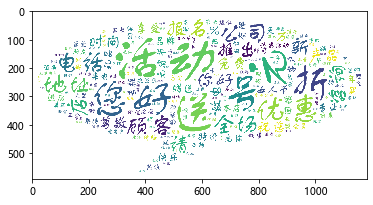

In [44]:
# 词云图绘制
from wordcloud import WordCloud
mask = plt.imread('基于文本内容的垃圾短信识别-数据&代码/duihuakuan.jpg')
wc = WordCloud(mask=mask,background_color='white',font_path='C:\\Windows\\Fonts\\FZSTK.TTF')
wc.fit_words(word_fre)
plt.imshow(wc)

#### 构建识别垃圾短信的模型

In [52]:
# 获取训练样本的tf-idf权值向量
    # 拆分训练集和测试集
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
data_tr,data_te,labels_tr,labels_te = train_test_split(adata,labels,test_size=0.2)
data_tr,data_te,labels_tr,labels_te

(0
 40481                                  黑恶势力 官员 勾结 作案 可能性 较大
 25966     您好 恒大 绿洲 小周 电话 恒大 绿洲 三期 御景楼 王 ㎡ 全线 户型 送元 ㎡ 全房 ...
 490076                         打算 一次性 考 南京 工程学院 本二 车辆 工程 专业
 399514                                 龙庆 社区 对名 矫正 人员 走访 工作
 184330    亲爱 会员 新年好 玫瑰 曼妮芬 内衣 品牌 王府井 专柜 内衣 特惠 活动 两件 折 三件...
                                 ...                        
 558781       美钻 一口价 稀售 炫彩 K 金买 送 限量 特惠 美丽 热线 老凤祥 临海 专卖店 欢迎您
 136876    会员 更是 享有 折上 折 波美 衣 玫瑰 玫瑰 波 优惠 勾引 勾引 地址 酷 酷 房县 ...
 788544    富林 地板 叫板 健康 任性 强化 元 实木 优惠 请 进店 咨询 地址 新风 地板 门业 ...
 137153    尊敬 顾客 您好 春熙路 茂业 百货 佰草集 专柜 号 全场 折 原价 积分 任意 购买 产...
 377758      氧宜 硅澡 泥 活动 做 全房 送 卧室 大礼 做 送 品质 环保 氧宜 期待 光临 地址 青
 Name: message, Length: 1599, dtype: object, 0
 348191                                周末 降息 通知 银 行有 过代 歀 记录
 252625                       pp 网贷 平台 优势 覆盖 传统 银行 难以 企及 借款人
 30739                                          法院 会怕 说 死 无赖
 95692     歐诗漫 感恩 爱美 真情 回馈 空前 折扣 振华 一卡通 十倍 积分 歐诗漫 会员 倍 积分...
 361453                            

In [53]:

countVectorizer = CountVectorizer()
data_tr = countVectorizer.fit_transform(data_tr)
X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)


In [56]:
# 创建模型
from sklearn.naive_bayes import GaussianNB #高斯朴素贝叶斯
X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
model = GaussianNB()
model.fit(X_tr,labels_tr)

model.score(X_te,labels_te)

0.86